# Paths of Generalized Positions
We've Generalized Similar Types of Positions into:

- Punting_Team
    - Punter
    - Gunner
    - Punter Protector
    - PuntFullBack
    - Punting Lineman
    - Punting Longsnapper
    - Punting Wing
- Returning Team
    - Defensive_Lineman
    - Defensive_Backer
    - Punt Returner
    - Jammer

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [32]:
ri = pd.read_csv('../working/role_info.csv')
generalized_list = ri['generalized_role'].unique()

## Custom Function

(<Figure size 864x455.76 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f799a928b00>)

/home/robmulla/anaconda3/envs/kaggle/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


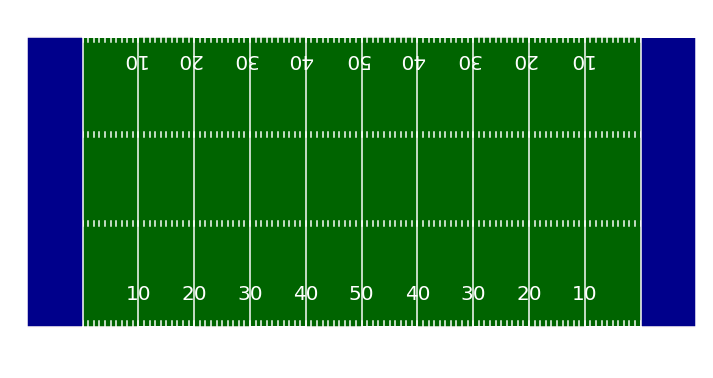

In [29]:
create_football_field()

In [28]:
def create_football_field(linenumbers=True, endzones=True, fifty_is_los=False):
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1, edgecolor='r', facecolor='darkgreen', zorder=0)
    fig, ax = plt.subplots(1, figsize=(12.0, 6.33))
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
                numb = x
                if x > 50:
                    numb = 120 - x
                plt.text(x, 5, str(numb - 10),
                         horizontalalignment='center',
                         fontsize=20, fontname='Arial', color='white')
                plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                         horizontalalignment='center',
                         fontsize=20, fontname='Arial', color='white', rotation=180)
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='yellow')
        plt.text(62, 50, '<- Line of Scrimmage', color='yellow')
    for x in range(1, 120):
        plt.plot([x, x], [0, 1], color='white', zorder=0)
        plt.plot([x, x], [53.3, 52.3], color='white', zorder=0)
        plt.plot([x, x], [18.5, 19.5], color='white', zorder=0)
        plt.plot([x, x], [34.8, 35.8], color='white', zorder=0)
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1, edgecolor='r', facecolor='darkblue', alpha=1, zorder=1)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1, edgecolor='r', facecolor='darkblue', alpha=1, zorder=1)
        ax.add_patch(ez1)
        ax.add_patch(ez2)

    return fig, ax

def create_generalized_role_paths(generalized_role):
    fig, ax = create_football_field(linenumbers=False, endzones=False, fifty_is_los=True)

    role_df_all = pd.read_parquet('../working/general_role/{}.parquet'.format(generalized_role))
    role_df_all['x-rel-snap-plus50'] = role_df_all['x-rel-snap'] + 60
    role_df_all['x-rel-snap-plus50'] = pd.to_numeric(role_df_all['x-rel-snap-plus50'])
    role_df_all.plot(x='x-rel-snap-plus50',y='y', kind='scatter',
                     ax=ax, alpha=0.05, color='white', s=1,
                     label='All {} Positions'.format(generalized_role),
                     title='Position {}'.format(generalized_role))

    role_df_all[role_df_all['injured_player']].plot(x='x-rel-snap-plus50', y='y',
                                                    kind='scatter', s=2,
                                                    color='red', ax=ax, label='Injured Players Route')
    role_df_all[role_df_all['primary_partner_player']] \
        .plot(x='x-rel-snap-plus50', y='y',
              kind='scatter', s=2,
              color='orange', ax=ax, label='Primary Partner Path')
    return fig, ax

Gunner


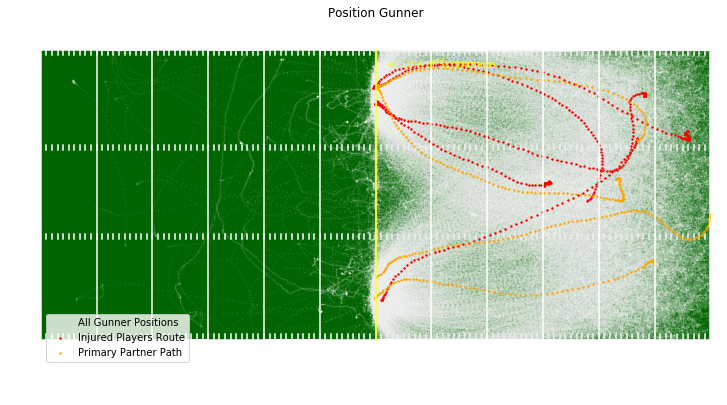

Punter
Broke for Punter
Punter_Protector


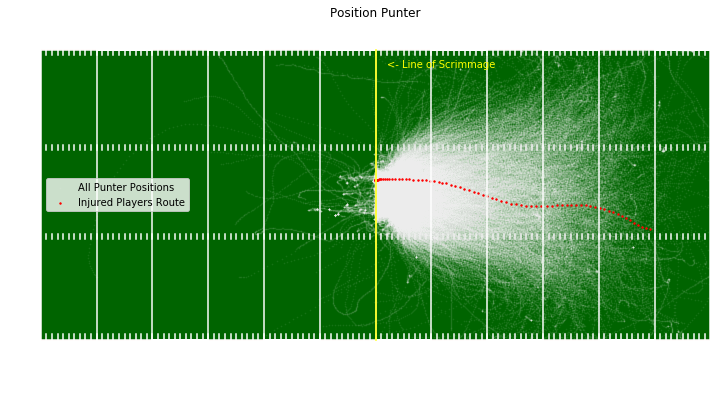

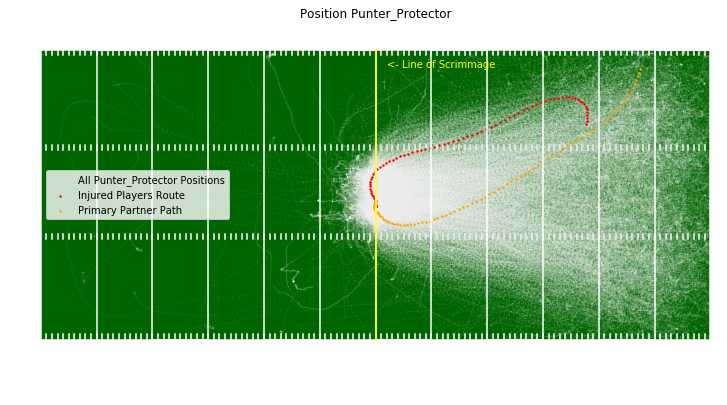

Defensive_Lineman


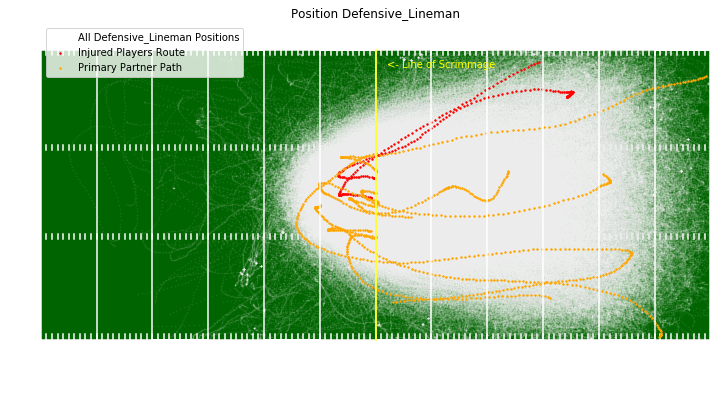

PuntFullBack
Broke for PuntFullBack
Punting_Lineman


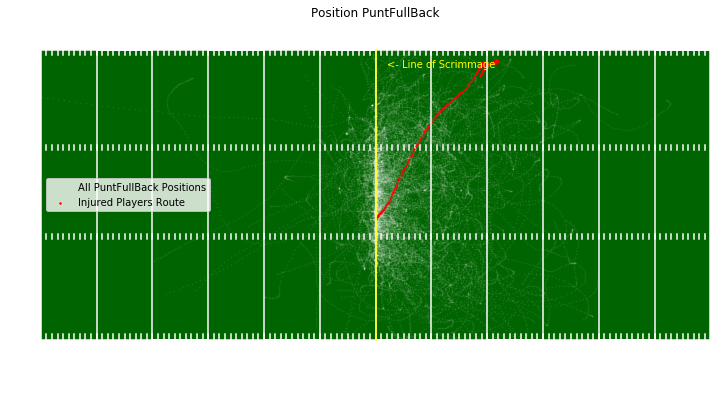

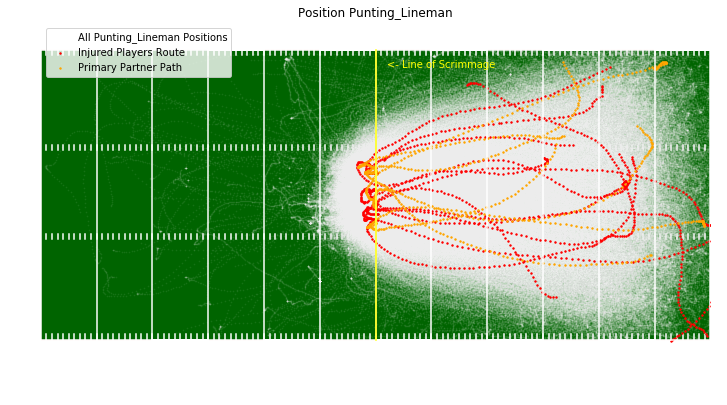

Defensive_Backer


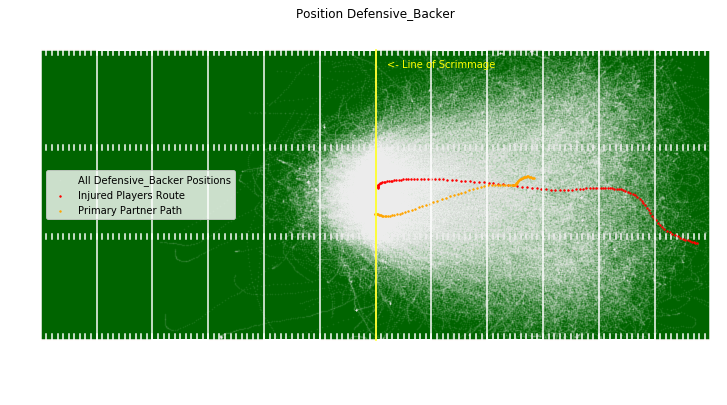

Punting_Longsnapper


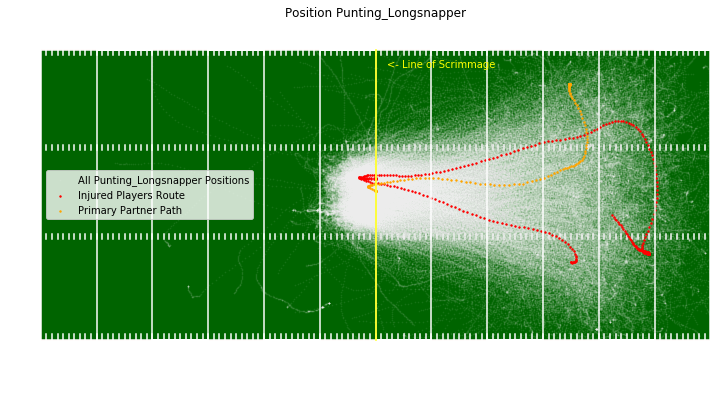

Punting_Wing


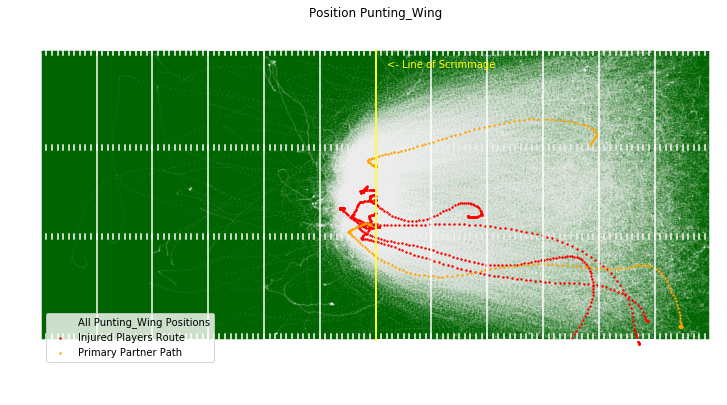

Punt_Returner


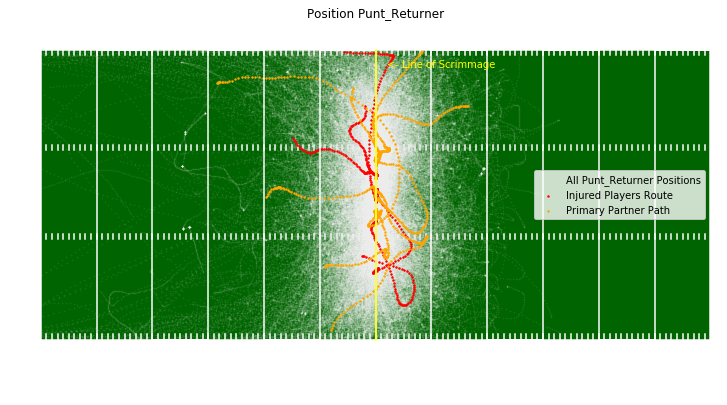

Jammer


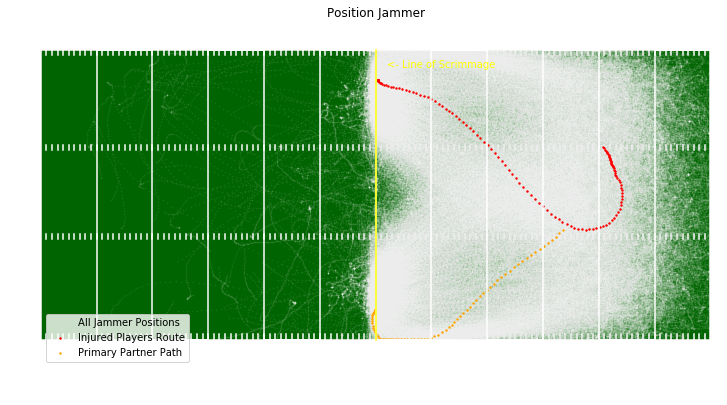

In [30]:
for role in generalized_list:
    try:
        print(role)
        fig, ax = create_generalized_role_paths(role)
        plt.show()
    except:
        print('Broke for {}'.format(role))